# Bias-variance tradeoff

This notebook shows the bias-variance tradeoff with the closed form solution of OLS. It saves the result as a plot to a file. 
Additionally one can run bias-variance decomposition for different number of datapoints. The results are displayed and saved as a figure. 


The plots from this notebook are used in Figure 12 and 13 of the article. 


In [1]:
import sys
import os
# Add the project root to sys.path
sys.path.append(os.path.abspath('..'))

from Functions.gradientdescent_lib import *
from Functions.PLOT import plot
from Functions.bootstrap import *

c:\Users\maxfo\Python\Lib\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse


In [2]:
#generate standard dataset

np.random.seed(1)
x_train, x_test, y_train, y_test = generateData(100, noise = 0.1)
x_train = x_train.flatten(); x_test = x_test.flatten()

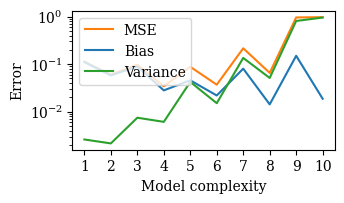

In [3]:
np.random.seed(1)
n_bootstraps = 500
n_degrees = 10
poly_degrees = list(range(1, n_degrees + 1))
noIntercept = False

MSEs = np.zeros(len(poly_degrees))
variances = np.zeros(len(poly_degrees))
biases = np.zeros(len(poly_degrees))

for i, p in enumerate(poly_degrees):
    X_train = featureMat(x_train, p, noIntercept=noIntercept)
    X_test = featureMat(x_test, p, noIntercept=noIntercept)

    mseVals, r2Vals, bias, variance = bootstrap(n_bootstraps, X_train, y_train, X_test, y_test, evaluate_OLS_analytic)
    
    MSEs[i] = np.mean(mseVals)
    biases[i] = bias
    variances[i] = variance

plot(
    nGraphs = 3,
    x_axis_array = poly_degrees,
    y_features = [MSEs, biases, variances],
    y_feature_label = ['MSE', 'Bias', 'Variance'],
    foldername = 'figures',
    figurename = f'bias-variance_model_complexity',
    x_label = 'Model complexity',
    y_label = 'Error',
    title = '',
    x_integer_entries = True,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False,
    y_logplot = True,
    legend_loc = 'upper left'
    )

BV-decomposition gradually changing number of datapoints

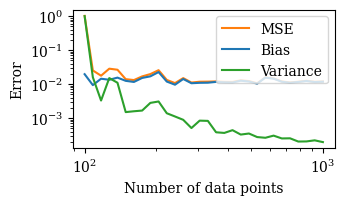

In [4]:
np.random.seed(1)
n_bootstraps = 100
n_degrees = 10
noIntercept = False
N_POINTS = np.logspace(2, 3, 30)

MSEs = np.zeros(len(N_POINTS))
variances = np.zeros(len(N_POINTS))
biases = np.zeros(len(N_POINTS))

for i, points in enumerate(N_POINTS):
    np.random.seed(1)
    x_train, x_test, y_train, y_test = generateData(int(points), noise = 0.1)
    x_train = x_train.flatten(); x_test = x_test.flatten()

    X_train = featureMat(x_train, n_degrees, noIntercept=noIntercept)
    X_test = featureMat(x_test, n_degrees, noIntercept=noIntercept)

    mseVals, r2Vals, bias, variance = bootstrap(n_bootstraps, X_train, y_train, X_test, y_test, evaluate_OLS_analytic)
    
    MSEs[i] = np.mean(mseVals)
    biases[i] = bias
    variances[i] = variance

plot(
    nGraphs = 3,
    x_axis_array = N_POINTS,
    y_features = [MSEs, biases, variances],
    y_feature_label = ['MSE', 'Bias', 'Variance'],
    foldername = 'figures',
    figurename = f'bias-variance_n_points_OLS_d{n_degrees}',
    x_label = 'Number of data points',
    y_label = 'Error',
    title = '',
    x_integer_entries = False,
    y_integer_entries = False,
    save = True,
    scatter = None,
    multiX = False,
    x_logplot = True,
    y_logplot = True,
    legend_loc = 'upper right'
    )